# Multiple Linear Regression

#### Task : Predict petrol consumption of a country given various factors such as tax,distance of highways and population with driving license
#### Input : Tax,distance of highways,average income and population with driving license
#### Output : Expected petrol consumption

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('w1_petrol_consumption-220925-152435.csv')

In [3]:
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
data.shape

(48, 5)

In [5]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


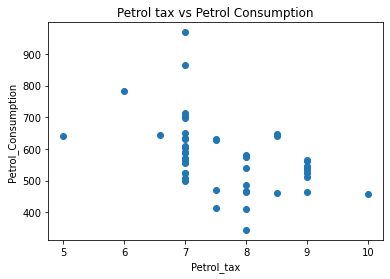

In [6]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(data['Petrol_tax'],data['Petrol_Consumption'],'o')
plt.title('Petrol tax vs Petrol Consumption')
plt.xlabel('Petrol_tax')
plt.ylabel('Petrol_Consumption')

plt.show()

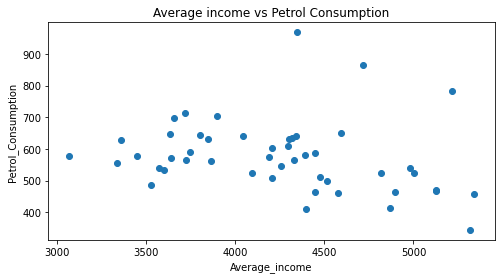

In [7]:
plt.figure(figsize=(8,4))
plt.plot(data['Average_income'],data['Petrol_Consumption'],'o')
plt.title('Average income vs Petrol Consumption')
plt.xlabel('Average_income')
plt.ylabel('Petrol_Consumption')

plt.show()

### Train the model

In [8]:
y=data['Petrol_Consumption']
x=data[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']]

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [11]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [12]:
regressor.intercept_ 

396.58908680328693

In [13]:
regressor.coef_

array([-4.41461642e+01, -6.57785154e-02, -2.43348926e-03,  1.43161142e+03])

### Make Predictions

In [14]:
y_pred=regressor.predict(x_test)

In [15]:
results=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(results)

    Actual   Predicted
23     547  447.928464
12     525  575.591704
42     632  659.134274
16     603  609.079108
35     644  737.437039
43     591  562.130158
46     610  686.939414
13     508  575.051588
14     566  653.178314
0      541  511.165952


### Evaluating the Model

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)

print(f'Mean Absolute error: {MAE:.2f}')
print(f'Mean Squared error: {MSE:.2f}')
print(f'Root Mean Squared error: {RMSE:.2f}')

Mean Absolute error: 56.62
Mean Squared error: 4161.76
Root Mean Squared error: 64.51


In [21]:
regressor.score(x_test,y_test)

-1.161267326962541

In [22]:
regressor.score(x_train,y_train)

0.7275188986304032

#### Possible improvement:
     Increase size of the data
     Try non-linear relation
     May require more feature